In [2]:
import tensorflow as tf;
print("Tensorflow versioin " + tf.__version__ )

Tensorflow versioin 2.19.0


# First Model

   SquareFootage   Price
0           1500  200000
1           1800  250000
2           2400  300000
3           3000  350000
4           3500  400000
Training data: (5, 1), (5,)
Testing data: (2, 1), (2,)
Intercept: -68611.5214180206
Coefficient: 143.2791728212703
Predicted Prices: [146307.23781388 189290.98966027]
Actual Prices: [200000 250000]
Mean Squared Error: 3284248323.802326
R-squared: -4.254797318083722


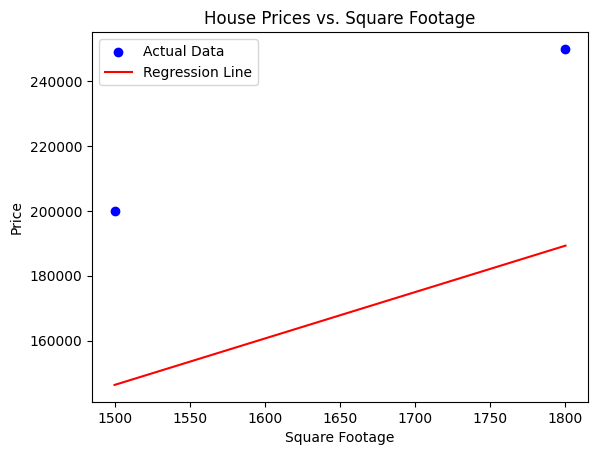

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample dataset (house prices based on square footage)
data = {
    'SquareFootage': [1500, 1800, 2400, 3000, 3500, 4000, 4500],
    'Price': [200000, 250000, 300000, 350000, 400000, 500000, 600000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())


# Features (X) and Target (y)
X = df[['SquareFootage']]  # Feature(s)
y = df['Price']            # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Prices:", y_pred)
print("Actual Prices:", y_test.values)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Prices vs. Square Footage')
plt.legend()

# Show the plot
plt.show()


# Second Model

   StudyHours  Pass
0           1     0
1           2     0
2           3     0
3           4     0
4           5     0
Training data: (8, 1), (8,)
Testing data: (2, 1), (2,)
Intercept: [-6.28495636]
Coefficient: [1.14270903]
Predicted Outcomes (Pass/Fail): [1 0]
Actual Outcomes: [1 0]
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/Users/boda/Proj/ai-ml-fundamentals/anacenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


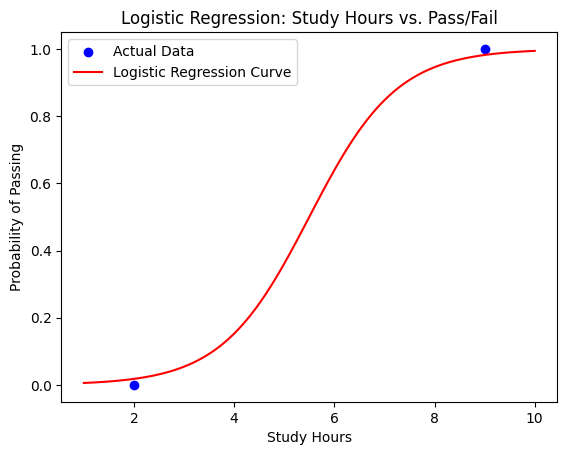

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Sample dataset: Study hours and whether students passed or failed
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

# Features (X) and Target (y)
X = df[['StudyHours']]  # Feature(s)
y = df['Pass']          # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Create a range of study hours for plotting
study_hours_range = np.linspace(X.min(), X.max(), 100)

# Calculate predicted probabilities using the sigmoid function
y_prob = model.predict_proba(study_hours_range.reshape(-1, 1))[:, 1]

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the logistic regression curve
plt.plot(study_hours_range, y_prob, color='red', label='Logistic Regression Curve')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Study Hours vs. Pass/Fail')
plt.legend()

# Show the plot
plt.show()


# Third Model

   StudyHours  PrevExamScore  Pass
0           1             30     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0
Training data: (8, 2), (8,)
Testing data: (2, 2), (2,)
Tree depth: 1
Number of leaves: 2
Predicted Outcomes (Pass/Fail): [1 0]
Actual Outcomes: [1 0]
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



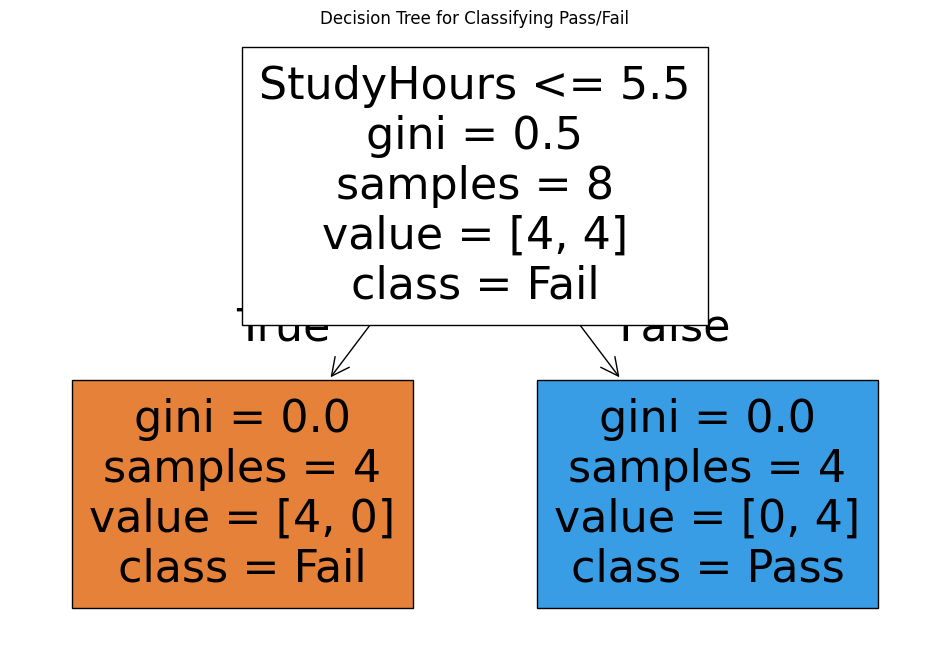

Accuracy (Tuned Model): 1.0


In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']                           # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's parameters
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

# Limit the tree depth to avoid overfitting
model_tuned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
model_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = model_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Model): {accuracy_tuned}")

# Linear Regression Vs Decision Trees

   StudyHours  PrevExamScore  Pass
0           1             30     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0
Training data: (8, 2), (8,)
Testing data: (2, 2), (2,)
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Logistic Regression:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Decision Tree:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    ac

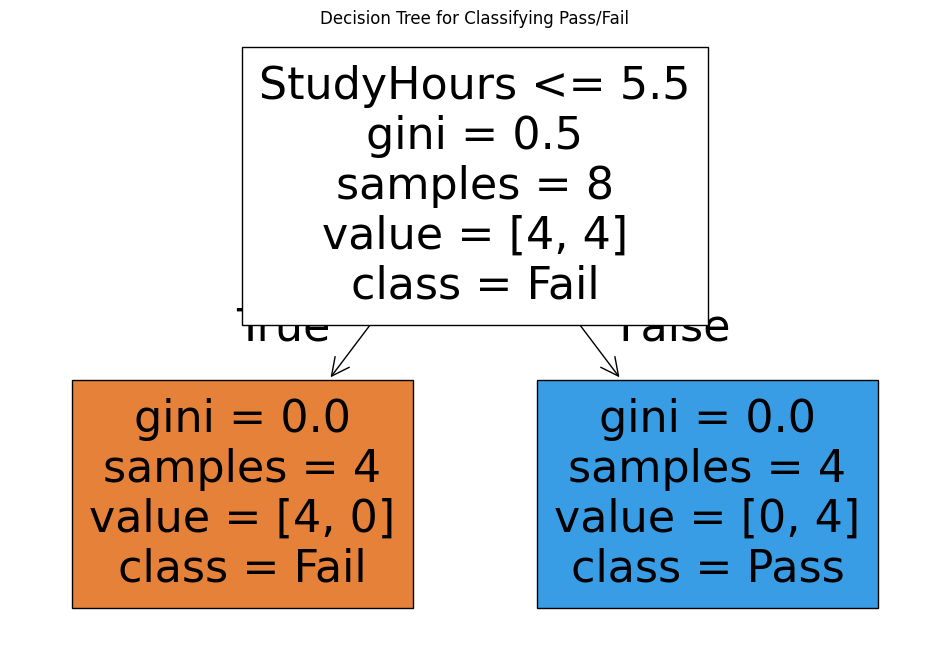

In [31]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']  # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")


# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()